In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
#load dataset
def load_dataset(filename):
    df = pd.read_csv(filename)
    df.rename(columns={'Date/Time':'Time', 'LV ActivePower (kW)':'ActivePower', 'Theoretical_Power_Curve (KWh)':'TheoriticalPower', 'Wind Direction (°)':'WindDirection', 'Wind Speed (m/s)':'Speed'}, inplace=True)
    speed = df.drop(labels = ['TheoriticalPower', 'ActivePower', 'WindDirection'], axis = 1)
    direction = df.drop(labels = ['TheoriticalPower', 'ActivePower', 'Speed'], axis = 1)
    return speed, direction

speed, direction = load_dataset("Scada_dataset.csv")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


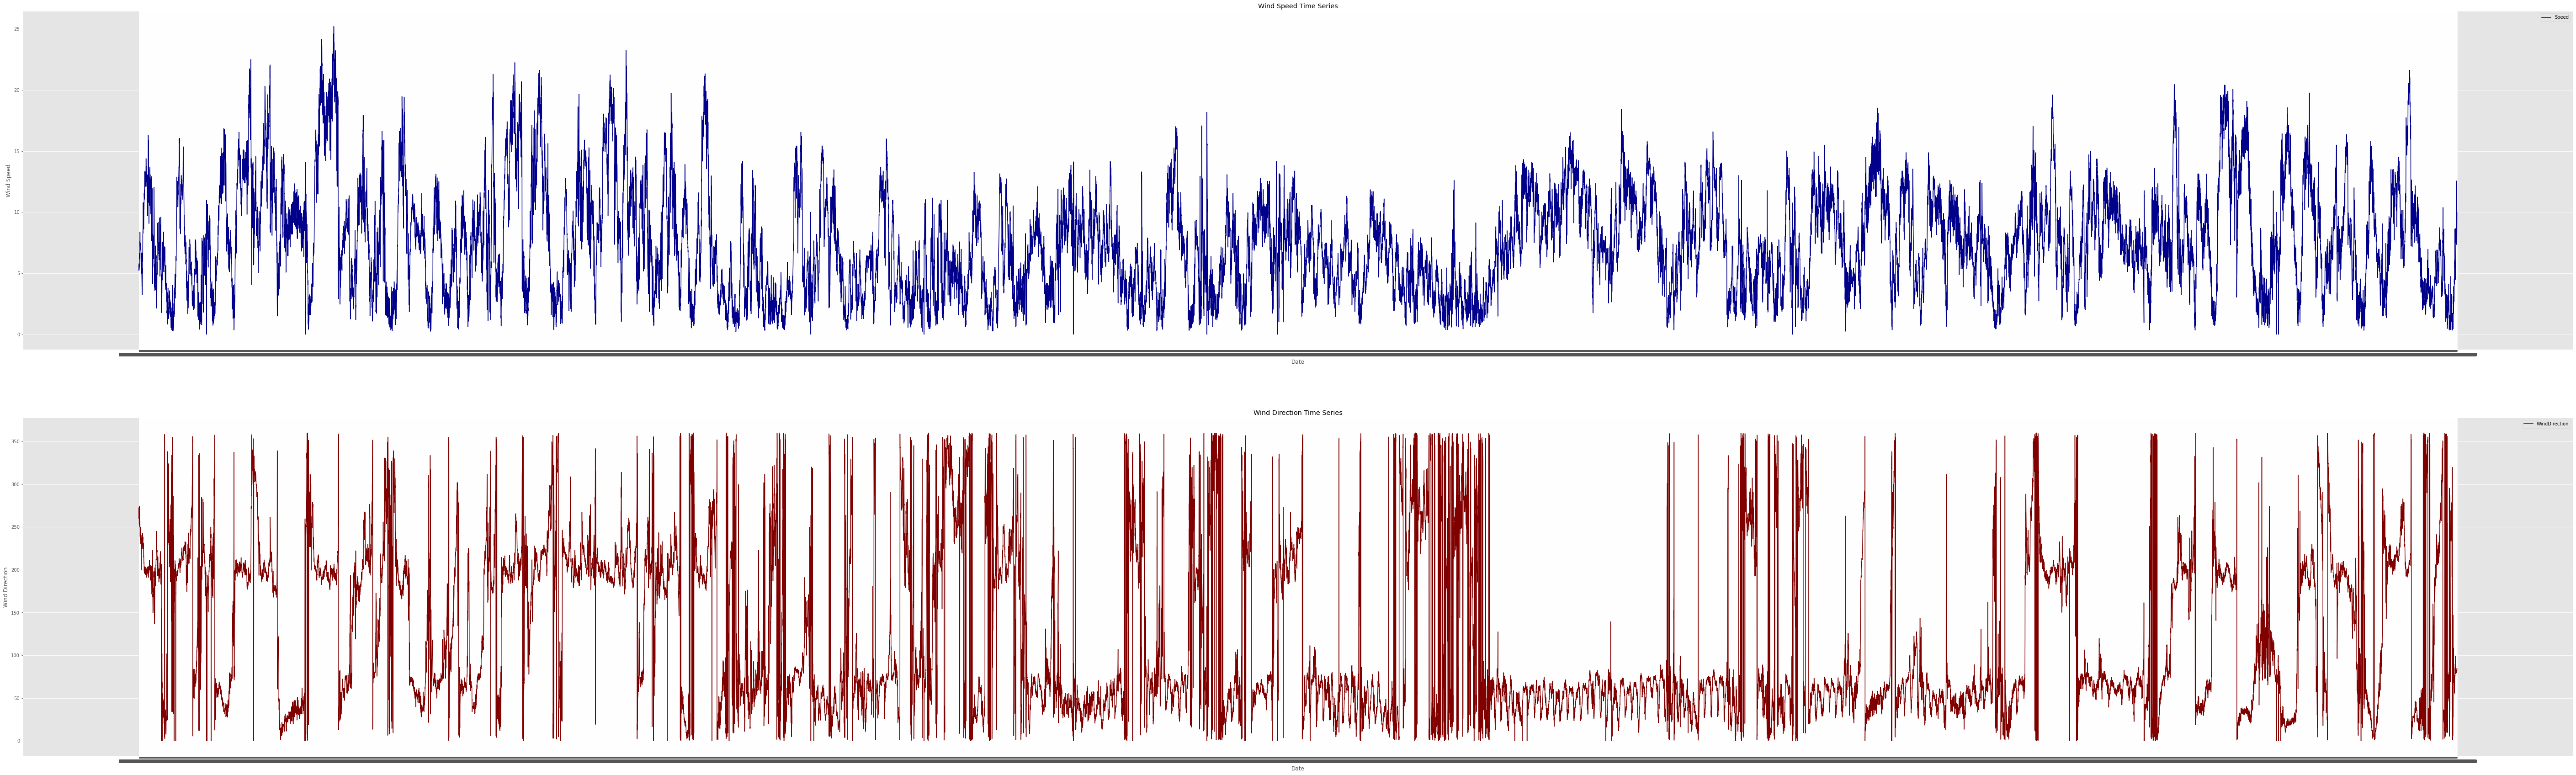

In [ ]:
#plotting time series
def plot_trend(speed, dir):

    #plotting style
    plt.style.use("ggplot");
    #plotting data
    plt.figure(figsize=(100, 30));
    plt.subplot(2, 1, 1)
    plt.plot(speed.set_index('Time'), 'darkblue');
    plt.title('Wind Speed Time Series');
    plt.xlabel('Date'); plt.ylabel('Wind Speed');
    plt.legend(['Speed']);
    plt.subplot(2, 1, 2)
    plt.plot(dir.set_index('Time'), 'maroon');
    plt.title('Wind Direction Time Series');
    plt.xlabel('Date'); plt.ylabel('Wind Direction');
    plt.legend(['WindDirection']);
    plt.savefig('ws_wd_ts.png', bbox_inches='tight', orientation = 'landscape');

plot_trend(speed, direction)

<Figure size 21600x1440 with 0 Axes>

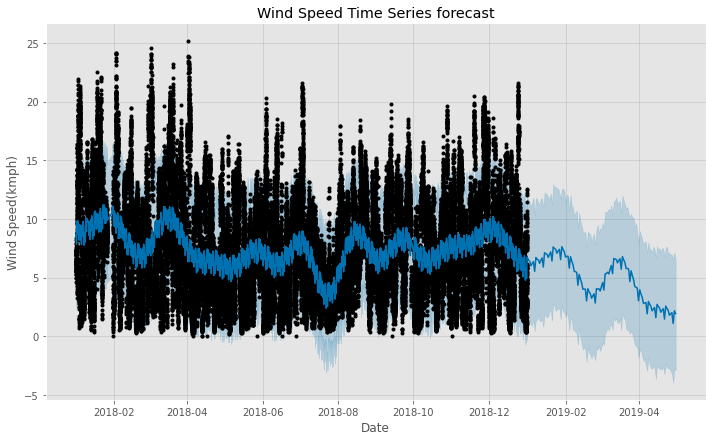

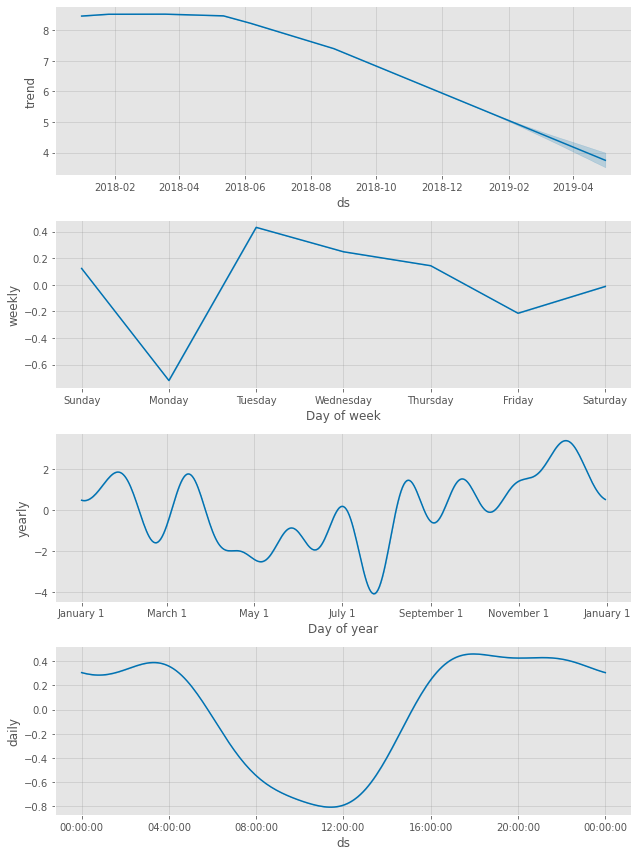

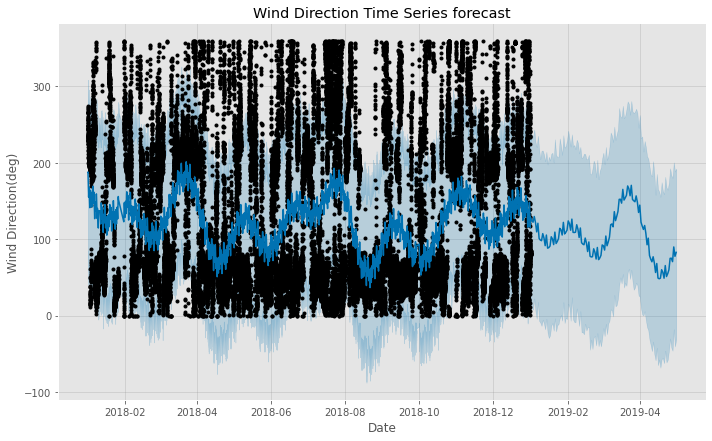

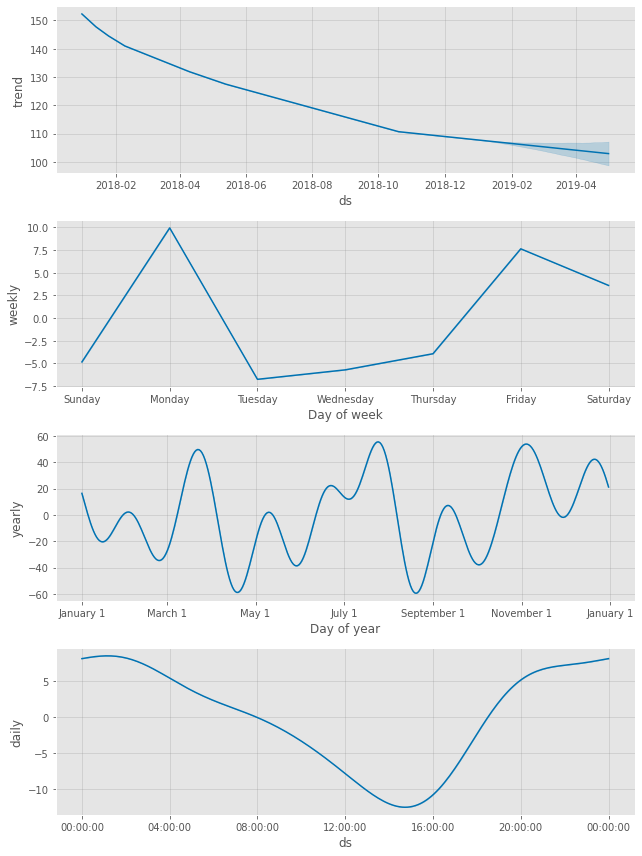

In [ ]:
#time series forecast
def time_series(speed, dir):

    #plotting style
    plt.style.use("seaborn-dark-palette");
    #plotting data
    plt.figure(figsize=(300, 20));
    #speed trend fitting and forecasting
    speed.columns = ['ds','y']
    speed_model = Prophet(daily_seasonality=True, yearly_seasonality=True)
    speed_model.fit(speed)
    future_speed = speed_model.make_future_dataframe(periods = 120)
    speed_forecast = speed_model.predict(future_speed)
    #speed_forecast.tail().T
    speed_model.plot(speed_forecast, xlabel = 'Date', ylabel = 'Wind Speed(kmph)');
    plt.title('Wind Speed Time Series forecast');
    plt.savefig('speed_forecast.png', bbox_inches='tight', orientation = 'landscape');
    speed_model.plot_components(speed_forecast).savefig('speed_components.png', bbox_inches='tight', orientation = 'landscape');

    #direction trend fitting and forecasting
    dir.columns = ['ds','y']
    dir_model = Prophet(daily_seasonality=True, yearly_seasonality=True)
    dir_model.fit(dir)
    future_dir = dir_model.make_future_dataframe(periods = 120)
    dir_forecast = dir_model.predict(future_dir)
    #dir_forecast.tail().T
    dir_model.plot(dir_forecast, xlabel = 'Date', ylabel = 'Wind Direction(deg)');
    plt.title('Wind Direction Time Series forecast');
    plt.savefig('dir_forecast.png', bbox_inches='tight', orientation = 'landscape');
    dir_model.plot_components(dir_forecast).savefig('dir_components.png', bbox_inches='tight', orientation = 'landscape');

time_series(speed, direction)